In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
train_data = pd.read_parquet("data/train-00000-of-00002.parquet")
test_data = pd.read_parquet("data/train-00001-of-00002.parquet")

### Working with the train part of the data, the test part is only for future eval. 

In [3]:
train_data

,ssn,cc_num,first,last,gender,city,state,zip,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,c036244703adb9d5392f4027d9d4b38d,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek
1,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,42f000b0b3b0ef534e5b8ef9ec1db13a,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke
2,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,543037b1baf088961e58d00b705f4bcc,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman
3,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,00a4e08643edebf9277c2967676f6a26,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills
4,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,492c4412815306718f686fc5b459a285,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323342,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,43be7fc41178e7fb103f095a237f09e9,2023-05-25,23:00:08,1685035808,home,573.79,0,fraud_Skiles LLC
1323343,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,aa71a8bb13b2e6b805d20ce0fa83b0d4,2023-09-09,20:53:12,1694272992,kids_pets,5.36,0,fraud_Nolan-Williamson
1323344,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,57b2735703f6d158b0ca78af79e019b4,2023-06-17,21:13:42,1687016622,home,186.73,0,fraud_Cole
1323345,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,a884adce23c9f87acfde0292e536b78a,2023-03-17,21:51:35,1679070095,home,251.83,0,fraud_Eichmann-Kilback


In [4]:
# data understanding, shape of the data, expressed in less technical terms
shape = train_data.shape
rows = shape[0]
columns = shape[1]

print(f"There are {rows} number of rows and {columns} number of columns in the train dataset")

There are 1323347 number of rows and 20 number of columns in the train dataset


This is enough data, I think.

In [5]:
# figuring out how many missing values are in the dataset
n_null = sum(train_data.isnull().sum())

print(f"There are {n_null} number of null data in the train dataset")

There are 0 number of null data in the train dataset


Interestingly, there are no null (missing) values in the dataset

In [6]:
# A more detailed info about the data, to tell what data type each column is, to aid EDA
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323347 entries, 0 to 1323346
Data columns (total 20 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ssn         1323347 non-null  object 
 1   cc_num      1323347 non-null  int64  
 2   first       1323347 non-null  object 
 3   last        1323347 non-null  object 
 4   gender      1323347 non-null  object 
 5   city        1323347 non-null  object 
 6   state       1323347 non-null  object 
 7   zip         1323347 non-null  int64  
 8   city_pop    1323347 non-null  int64  
 9   job         1323347 non-null  object 
 10  dob         1323347 non-null  object 
 11  acct_num    1323347 non-null  int64  
 12  trans_num   1323347 non-null  object 
 13  trans_date  1323347 non-null  object 
 14  trans_time  1323347 non-null  object 
 15  unix_time   1323347 non-null  int64  
 16  category    1323347 non-null  object 
 17  amt         1323347 non-null  float64
 18  is_fraud    1323347 no

The columns (names) are not necessarily all self explanatory, each one will be gotten into for detailed analysis in the EDA (Exploratory Data Analysis)

# EDA

Selecting the categorical and numerical columns seperately, since each of the data type categories work with (and requires) different type of operations (cleaning, encoding, ...)

In [7]:
cat_cols_train = train_data.select_dtypes("object")
num_cols_train = train_data.select_dtypes("number")

cat_len = len(cat_cols_train.columns.to_list())
num_len = len(num_cols_train.columns.to_list())
print(f"There are {cat_len} columns with the object data type and {num_len} columns being any of the numerical data type (float or int)")

There are 13 columns with the object data type and 7 columns being any of the numerical data type (float or int)


Since all the selected columns sum up to 20 (13+7) -the total number of columns in the dataset (originally), we can continue with the analysis. Attending to each category (numerical/catergorical) one at a time.

### Categorical columns analysis

In [8]:
# What does the categorical data look like?
cat_cols_train

,ssn,first,last,gender,city,state,job,dob,trans_num,trans_date,trans_time,category,merchant
0,367-85-9826,Kristie,Davis,F,Chandler,OK,Chief Strategy Officer,1987-06-12,c036244703adb9d5392f4027d9d4b38d,2021-07-31,02:30:01,grocery_pos,fraud_Kovacek
1,367-85-9826,Kristie,Davis,F,Chandler,OK,Chief Strategy Officer,1987-06-12,42f000b0b3b0ef534e5b8ef9ec1db13a,2021-08-01,22:37:41,personal_care,fraud_Bradtke
2,367-85-9826,Kristie,Davis,F,Chandler,OK,Chief Strategy Officer,1987-06-12,543037b1baf088961e58d00b705f4bcc,2021-08-01,23:02:09,personal_care,fraud_Kozey-Kuhlman
3,367-85-9826,Kristie,Davis,F,Chandler,OK,Chief Strategy Officer,1987-06-12,00a4e08643edebf9277c2967676f6a26,2021-08-01,22:27:24,health_fitness,fraud_Hills
4,367-85-9826,Kristie,Davis,F,Chandler,OK,Chief Strategy Officer,1987-06-12,492c4412815306718f686fc5b459a285,2021-12-02,02:28:51,misc_pos,fraud_Kemmer-Buckridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323342,354-09-0802,Joanna,Cabrera,F,Los Angeles,CA,Lecturer,1977-07-07,43be7fc41178e7fb103f095a237f09e9,2023-05-25,23:00:08,home,fraud_Skiles LLC
1323343,354-09-0802,Joanna,Cabrera,F,Los Angeles,CA,Lecturer,1977-07-07,aa71a8bb13b2e6b805d20ce0fa83b0d4,2023-09-09,20:53:12,kids_pets,fraud_Nolan-Williamson
1323344,354-09-0802,Joanna,Cabrera,F,Los Angeles,CA,Lecturer,1977-07-07,57b2735703f6d158b0ca78af79e019b4,2023-06-17,21:13:42,home,fraud_Cole
1323345,354-09-0802,Joanna,Cabrera,F,Los Angeles,CA,Lecturer,1977-07-07,a884adce23c9f87acfde0292e536b78a,2023-03-17,21:51:35,home,fraud_Eichmann-Kilback


For detailed analysis, each column will be looked at one at a time, too. To avoid ambuguity, since this process ensure each column is understood for what it is.

##### `ssn` column

This contains the ssn (social security number) of the person related to each transaction, and this is not necessarily a criteria for fraud, the model won't learn anything from this particular column. Therefore it should be dropped

##### `first` and `last` (first name and last name) columns

The initial plan is to treat each column one at a time (and not two as I am doing here), but EDA is not a "one shoe fits all" kind of thing, and there is trade-off between details and optimised reasoning, the first name and last name columns seem to contain the same info (to avoid redundancy, they are treated together), they seem to be just as unnecessary as the `ssn` column from before, and they should also be dropped

##### `gender` column

In [9]:
# checking the distribution
cat_cols_train["gender"].value_counts()

gender
F    734694
M    588653
Name: count, dtype: int64

This contains a pattern that we can go with, requiring further preprocessing (encoding)

#### `city` and `state` column

These two are also similar in the kind of information they provide, so they are being considered together.<br>
They both seem relevant and will be saved for model training

In [10]:
cat_cols_train["city"].value_counts()

city
Chicago            20806
Los Angeles        18414
Houston            17541
West Palm Beach    14241
Jacksonville       13153
                   ...  
West Jefferson         8
Indianola              8
Lakewood               7
Naperville             7
Pompano Beach          7
Name: count, Length: 394, dtype: int64

In [11]:
cat_cols_train["state"].value_counts()

state
CA    170718
FL    102953
TX     98570
NY     65717
IL     61381
MI     50386
NJ     49322
TN     47106
OH     44928
NC     43791
MN     41631
GA     38360
OK     36162
PA     31863
WA     30690
MA     27400
VA     26332
WI     21932
SC     21919
IN     20802
KY     18582
AZ     17542
NM     17518
NV     17500
MT     17498
CT     16418
AL     15344
MO     12085
LA     12055
MS     12054
CO     12048
OR     10978
UT     10952
AK     10944
WV     10937
IA      9892
NE      9862
SD      8760
ID      8750
VT      7666
DE      6574
AR      6574
HI      6567
MD      5490
NH      3306
KS      2194
ME      2193
WY      1101
Name: count, dtype: int64

These are resonable patterns that one can work it.

##### `job` column

This seem important, and a view of the data sistribution will be able to tell us whether the column has some "pattern" to it

In [12]:
cat_cols_train["job"].value_counts()

job
Engineer                 59170
Psychologist             28471
Teacher                  24076
Surveyor                 23053
Research officer         22997
                         ...  
Radiographer                 9
Dancer                       8
Geochemist                   8
Merchant navy officer        8
Hydrologist                  7
Name: count, Length: 279, dtype: int64

Interestingly, yes. The data is useful for modelling and will be saved for further processing (encoding and modelling)

`dob` (date of birth) column

We may not necessarily need to use dates directly for the dob, another way to represent this is age, which is a more common variable, and convinient to deal with, for both the modelling and serving users. There for, the dob will be converted to age, using a simple python funtion and pandas's `apply` method, thereby changing it to a numerical column

In [13]:
def convert_dob_to_age(dob, base_year=2024):
    # the data is found to be uploaded in 2024, it might have been collected much earlier, but that's the thing
    # most data are biased. Therefore the age will be calculated based on the year 2024
    year, *_ = dob.split("-")
    year = int(year)
    age = base_year - year
    
    return age

# testing the funtion with a sample dob
test_age = convert_dob_to_age("1987-06-12")
print(f"The age of the 'test person' wrt 2024 is: {test_age}")

The age of the 'test person' wrt 2024 is: 37


##### `trans_num`, `trans_date` and `trans_time` columns

The three columns are again being treated together as they are related to the transactions particularly.
* `trasn_num`: seem to contain transaction ids and since not two transactions will have the same id, it is useless to train a model based on that.
* `trans_date`: contains data on the dates each of the transactions took place, this is also not needed, except in a case of time-series analysis which will then be looking to predict dates for future possible frauds
* `trans_time`: this can help though, since there are generally odd times for any type of transaction to take place. As can be found in this [report](https://www.express.co.uk/finance/personalfinance/1898436/afternoon-most-common-time-scammed-survey-finds).<br>
However, using the raw time provided may create a more diverse distribution in the column, this diversity can be reduced to an hourly basis, where only the hour of the day will be used, with respect to AM and PM, this will also ensure it is still a categorical column

In [14]:
# function to convert time to hour of the day (e.g 2AM and 2PM)
def convert_to_hour(time):
    hour, *_ = time.split(":")
    hour = int(hour)
    
    # determine whether it is AM or PM, and convert
    raw_hour = hour % 12
    am_pm_factor = hour // 12
    am_pm_map = {0: "AM", 1:"PM"}
    
    hour = f"{raw_hour} {am_pm_map.get(am_pm_factor)}"
    return hour

test_time_1 = "02:30:01" # expecting 2 am
test_time_2 = "23:00:08" # expecting 11 pm in this case

print(f"test time 1: {convert_to_hour(test_time_1)}")
print(f"test time 2: {convert_to_hour(test_time_2)}")

test time 1: 2 AM
test time 2: 11 PM


`category` column

This is a valid modelling column, the category of the transaction has a tendency of telling whether it's more likely to be fraudulent or not, there are some categories flooded with fraudsters in general. Looking at the distribution will be able to tell more about it.

In [15]:
cat_cols_train["category"].value_counts()

category
shopping_pos      133302
grocery_pos       125922
home              125183
kids_pets         114657
shopping_net      102353
gas_transport      99907
food_dining        98740
personal_care      95194
entertainment      94868
misc_pos           87351
health_fitness     83079
grocery_net        61993
misc_net           60686
travel             40112
Name: count, dtype: int64

Yes, there sure is pattern (categorical) in this one.

`merchant` column

This column contains the name of the merchants, and there seem to be no correlation between name and fraud, users providing the merchant's name with other parameters cannot help determine whether it's likely a fraud, especially since that will be outside of its training data most of the time.

### Categorical EDA summary.

* columns to remove (`ssn`, `first`, `last`, `trans_num`, `trans_date`, `merchant`)
* columns to leave untouched (`gender`, `state`, `city`, `job`, `category`)
* `dob` will be converted to age (wrt 2024)
* `trans_time` to be converted hour of the day (e.g 2 AM, 11 PM)

Writing a single funtion, that appplies to this (summary) to the categorical part of the data. We could have applied this along with the EDA, but, the function can be easily called on the test data as well. 

In [16]:
# categorical column data formatting function
def format_cat_cols_data(data: pd.DataFrame) -> pd.DataFrame:
    # remove the said columns
    cols_to_rem = ["ssn", "first", "last", "trans_num", "trans_date", "merchant"]
    data = data.drop(columns=cols_to_rem)
    
    # apply the appropriate functions to dob and trans_time
    data["dob"] = data["dob"].apply(convert_dob_to_age)
    data["trans_time"] = data["trans_time"].apply(convert_to_hour)
    
    return data

# see what the data looks like when the funtion is applied
format_cat_cols_data(data=cat_cols_train)

,gender,city,state,job,dob,trans_time,category
0,F,Chandler,OK,Chief Strategy Officer,37,2 AM,grocery_pos
1,F,Chandler,OK,Chief Strategy Officer,37,10 PM,personal_care
2,F,Chandler,OK,Chief Strategy Officer,37,11 PM,personal_care
3,F,Chandler,OK,Chief Strategy Officer,37,10 PM,health_fitness
4,F,Chandler,OK,Chief Strategy Officer,37,2 AM,misc_pos
...,...,...,...,...,...,...,...
1323342,F,Los Angeles,CA,Lecturer,47,11 PM,home
1323343,F,Los Angeles,CA,Lecturer,47,8 PM,kids_pets
1323344,F,Los Angeles,CA,Lecturer,47,9 PM,home
1323345,F,Los Angeles,CA,Lecturer,47,9 PM,home


There are only 7 columns left (out of 13) in the categorical part of the original data. Now to the numerical part of the EDA

## Numerical columns analysis

In [17]:
# what does it look like?
num_cols_train

,cc_num,zip,city_pop,acct_num,unix_time,amt,is_fraud
0,4361337605230458,74834,7590,349734538563,1627678801,337.54,1
1,4361337605230458,74834,7590,349734538563,1627837661,21.13,1
2,4361337605230458,74834,7590,349734538563,1627839129,22.61,1
3,4361337605230458,74834,7590,349734538563,1627837044,17.32,1
4,4361337605230458,74834,7590,349734538563,1638392331,75.82,0
...,...,...,...,...,...,...,...
1323342,639046277658,90023,2383912,43586048731,1685035808,573.79,0
1323343,639046277658,90023,2383912,43586048731,1694272992,5.36,0
1323344,639046277658,90023,2383912,43586048731,1687016622,186.73,0
1323345,639046277658,90023,2383912,43586048731,1679070095,251.83,0


Since there is more data understanding now, The EDA process can actually be sped up, to combine similar columns if applicable.

`cc_num` and `acct_num` columns

cc_num stands for credit card number and acct_num means account number, both numbers are, in essence, IDs, therefore, they do not help in figuring out any pattern at all. and therefore will be removed.

`zip` and `city_pop` columns

city and zip represent same thing, actually, one of them must go, and I will pick zip to go, also, city_pop represents the city population, it may also look to represent the city, but I will conclude that it gives more depth to the location info, maybe cities with more people in it tend to report more fraud cases. Therefore, zip will go, and city_pop will remain.

`unix_time` column

This column seem like it is representing the same thing as the trans_date and trans_time columns combined, but, that's not enough, I have to confirm to be sure. Using an example from the original train_data (random index).

In [18]:
import datetime
data_sample = train_data.iloc[42]
date = data_sample["trans_date"]
trans_time = data_sample["trans_time"]
unix_time = data_sample["unix_time"]

unix_converted = datetime.datetime.fromtimestamp(unix_time)

print(f"Original time and date: {date} {trans_time}")
print(f"converted unix time: {unix_converted}")

Original time and date: 2021-08-14 07:28:52
converted unix time: 2021-08-14 02:58:52


This may look appear to not mean the same thing, but it does, it's off by some hours because of timezone difference. It has therefore been confirmed that the unix_time is infact not needed anymore too.

`amt` column

This column contains the transaction amount in USD, very important key factor.

`is_fraud` column

This is in fact the main point of this project, this column is the one that states whether a transaction is fraudulent or not, where 0 means no_fraud and 1 means yes_fraud (already encoded). All that has to be done is to look at the distribution of the target column to see what we are working at.

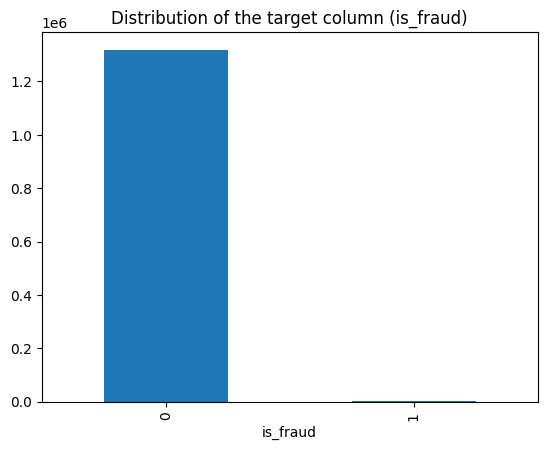

In [19]:
num_cols_train\
    .is_fraud\
    .value_counts()\
    .plot(kind="bar", title="Distribution of the target column (is_fraud)")

plt.show()

In [20]:
# calculating percentage
is_fraud = num_cols_train["is_fraud"]

total = len(is_fraud)
no_fraud = sum(is_fraud == 0)
yes_fraud = total - no_fraud

print(f"Percentage of non fradulent transactions {no_fraud/total * 100:.2f}")
print(f"Percentage of fradulent transactions {yes_fraud/total * 100:.2f}")

Percentage of non fradulent transactions 99.67
Percentage of fradulent transactions 0.33


This is heavily imbalanced, and that is just a representation of reality, as more transactions go on, and only few of them end up being fraudent. The case of fraud is an unwanted scenario, so they are not expected to happen often.<br>
However, I won't be going through the regular SMOTE upsampling, downsampling techiques, as SMOTE as been confirmed to not really work. As in this [report](https://datascience.stackexchange.com/questions/106461/why-smote-is-not-used-in-prize-winning-kaggle-solutions).<br>
I will instead use weighted class in the model training process (the training algorithm itself).

### Numerical EDA summary
* columns to remove (`cc_num`, `acct_num`, `zip`, `unix_time`)
* columns to keep (`city_pop`, `amt`, `is_fraud`)

In [21]:
def format_num_cols_data(data: pd.DataFrame) -> pd.DataFrame:
    cols_to_rem = ["cc_num", "acct_num", "zip", "unix_time"]
    
    data = data.drop(columns=cols_to_rem)
    return data

# seeing what the data looks like after applying the function
format_num_cols_data(data=num_cols_train)

,city_pop,amt,is_fraud
0,7590,337.54,1
1,7590,21.13,1
2,7590,22.61,1
3,7590,17.32,1
4,7590,75.82,0
...,...,...,...
1323342,2383912,573.79,0
1323343,2383912,5.36,0
1323344,2383912,186.73,0
1323345,2383912,251.83,0


Combining all the data preprocessing steps into a single function, to ease the cleaning process of test data later on

In [22]:
def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    cat_cplit = data.select_dtypes(include="object")
    num_split = data.select_dtypes(include="number")
    
    processed_cat = format_cat_cols_data(cat_cplit)
    processed_num = format_num_cols_data(num_split)
    
    combined = pd.concat([processed_cat, processed_num], axis=1)
    return combined.rename(columns={"dob":"age"}) # this line changes dob to age

cleaned_train = preprocess_data(data=train_data)
cleaned_train

,gender,city,state,job,age,trans_time,category,city_pop,amt,is_fraud
0,F,Chandler,OK,Chief Strategy Officer,37,2 AM,grocery_pos,7590,337.54,1
1,F,Chandler,OK,Chief Strategy Officer,37,10 PM,personal_care,7590,21.13,1
2,F,Chandler,OK,Chief Strategy Officer,37,11 PM,personal_care,7590,22.61,1
3,F,Chandler,OK,Chief Strategy Officer,37,10 PM,health_fitness,7590,17.32,1
4,F,Chandler,OK,Chief Strategy Officer,37,2 AM,misc_pos,7590,75.82,0
...,...,...,...,...,...,...,...,...,...,...
1323342,F,Los Angeles,CA,Lecturer,47,11 PM,home,2383912,573.79,0
1323343,F,Los Angeles,CA,Lecturer,47,8 PM,kids_pets,2383912,5.36,0
1323344,F,Los Angeles,CA,Lecturer,47,9 PM,home,2383912,186.73,0
1323345,F,Los Angeles,CA,Lecturer,47,9 PM,home,2383912,251.83,0


## Preparing data for model building

In [23]:
X = cleaned_train.drop(columns="is_fraud")
y = cleaned_train["is_fraud"]

In [24]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# I am doing this due to data type change that occued during the conversion of dob to age

cat_features = X_train.select_dtypes(include=["object", "category"]).columns
num_features = X_train.select_dtypes(include=["number"]).columns

# cat and num transformers

num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# combined column transformation
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

# final pipeline

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])
pipeline # visualise the pieline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'city_pop', 'amt'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'city', 'state', 'job', 'trans_time', 'category'], dtype='object'))]))])

In [26]:
X_train_enc = pipeline.fit_transform(X_train)
X_test_enc = pipeline.transform(X_test)

In [27]:
X_train_enc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8337078 stored elements and shape (926342, 764)>

# Model Training

In [28]:
# using a custom model class, to get everything done, easily
class Model:
    def __init__(self, models):
        self.models = models

    def _run_models_and_predict(self):
        metrics = {}
        for name, model in self.models.items():
            print(f"Training for model {name}")
            model = model.fit(X_train_enc, y_train)
            y_pred = model.predict(X_test_enc)
            
            report = classification_report(y_test, y_pred)
            metrics[name] = report
        return metrics

    def get_report(self):
        metrics = self._run_models_and_predict()
        for name, metric in metrics.items():
            print(f"\nModel name: {name}\n")
            print(f"Classification report:\n{metric}")

In [29]:
log_reg = LogisticRegression(penalty='l2', C=1, solver='liblinear', class_weight="balanced")
dec_tree = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight="balanced")
rand_frst = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42, class_weight="balanced")

models_schema = {
    "Logistic Regression" : log_reg,
    "Decision Tree" : dec_tree,
    "Random Forest" : rand_frst
}

In [30]:
Model(models=models_schema).get_report()

Training for model Logistic Regression
Training for model Decision Tree
Training for model Random Forest

Model name: Logistic Regression

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    395640
           1       0.03      0.82      0.05      1365

    accuracy                           0.89    397005
   macro avg       0.51      0.85      0.50    397005
weighted avg       1.00      0.89      0.94    397005


Model name: Decision Tree

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87    395640
           1       0.01      0.96      0.03      1365

    accuracy                           0.78    397005
   macro avg       0.51      0.87      0.45    397005
weighted avg       1.00      0.78      0.87    397005


Model name: Random Forest

Classification report:
              precision    recall  f1-score   support

           0       1.00    

### Which Model is Best?
Based on the classification report, Random Forest is the best model. Here's why:

* Better balance: While the recall for Random Forest is not as high as Decision Tree, the F1-score for fraud detection (0.13) is significantly better than both Logistic Regression (0.05) and Decision Tree (0.03), showing a better trade-off between precision and recall.
* High accuracy: The accuracy of 0.97 is very high, and while it might be misleading due to the class imbalance, it reflects the model's performance in detecting non-fraud cases while maintaining reasonable recall for fraud cases.
* Stability: Random Forest tends to be more robust than Decision Trees because it combines multiple decision trees, reducing overfitting and improving generalization.

In [31]:
# cross_val_score
for name, model in models_schema.items():
    print(f"Model name: {name}")
    scores = cross_val_score(model, X_train_enc, y_train, cv=5)
    print("Cross-validation scores:", scores)
    print("Average cross-validation score:", scores.mean())
    print("\n")

Model name: Logistic Regression
Cross-validation scores: [0.88968473 0.89237811 0.89376471 0.88923613 0.89022929]
Average cross-validation score: 0.8910585939689117


Model name: Decision Tree
Cross-validation scores: [0.77522413 0.7781604  0.77426755 0.78625019 0.78558629]
Average cross-validation score: 0.779897712087853


Model name: Random Forest
Cross-validation scores: [0.96469458 0.96393892 0.96542306 0.96544465 0.96660513]
Average cross-validation score: 0.9652212701238201




random forest still looks promising

## Test data and inferencing

In [32]:
test_data

,ssn,cc_num,first,last,gender,city,state,zip,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,be1bc0ee2056bff3154f3c025e287a17,2023-09-15,20:25:38,1694789738,kids_pets,8.08,0,fraud_Crona and Sons
1,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,2cfdc99b3a1d424aa4d98e9838ff132e,2022-06-14,14:44:55,1655198095,shopping_pos,2.04,0,fraud_Turner and Sons
2,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,9bf52f50ee2f8bdb0f1018ed3d00a4d8,2023-04-16,22:15:49,1681663549,home,326.22,0,fraud_Beier and Sons
3,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,2e8c3e0cade154fb5c354502311d4475,2023-06-24,12:11:59,1687588919,home,975.38,0,fraud_Wuckert-Goldner
4,354-09-0802,639046277658,Joanna,Cabrera,F,Los Angeles,CA,90023,2383912,Lecturer,1977-07-07,43586048731,040f06c23980e385a7d373cedc7e1161,2022-02-22,18:39:50,1645535390,shopping_net,7.35,0,fraud_Kozey-Boehm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323342,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b2d8cfd9502a982b910edeea05baebe8,2023-06-02,22:05:19,1685723719,kids_pets,5.10,0,fraud_Cartwright PLC
1323343,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b688d8f1f21483947654a25891dd80fe,2023-07-27,12:19:49,1690440589,kids_pets,7.05,0,fraud_Waelchi Inc
1323344,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,f12b8b2933bb5280f4e8f41dd8d91295,2023-10-13,20:40:24,1697209824,personal_care,2.31,0,fraud_Emmerich-Rau
1323345,751-28-9829,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b243e1332abfcd5735cb0631e2fcc168,2023-05-19,19:03:38,1684503218,home,8.35,0,fraud_Renner Ltd


In [33]:
# data understanding, shape of the data, expressed in less technical terms
shape = test_data.shape
rows = shape[0]
columns = shape[1]

print(f"There are {rows} number of rows and {columns} number of columns in the train dataset")

There are 1323347 number of rows and 20 number of columns in the train dataset


In [34]:
# figuring out how many missing values are in the dataset
n_null = sum(train_data.isnull().sum())

print(f"There are {n_null} number of null data in the train dataset")

There are 0 number of null data in the train dataset


In [35]:
# cleaning test data with the original data that was used the other time
cleaned_test = preprocess_data(data=test_data)
cleaned_test

,gender,city,state,job,age,trans_time,category,city_pop,amt,is_fraud
0,F,Los Angeles,CA,Lecturer,47,8 PM,kids_pets,2383912,8.08,0
1,F,Los Angeles,CA,Lecturer,47,2 PM,shopping_pos,2383912,2.04,0
2,F,Los Angeles,CA,Lecturer,47,10 PM,home,2383912,326.22,0
3,F,Los Angeles,CA,Lecturer,47,0 PM,home,2383912,975.38,0
4,F,Los Angeles,CA,Lecturer,47,6 PM,shopping_net,2383912,7.35,0
...,...,...,...,...,...,...,...,...,...,...
1323342,F,Pleasant Garden,NC,Museum/gallery curator,55,10 PM,kids_pets,6962,5.10,0
1323343,F,Pleasant Garden,NC,Museum/gallery curator,55,0 PM,kids_pets,6962,7.05,0
1323344,F,Pleasant Garden,NC,Museum/gallery curator,55,8 PM,personal_care,6962,2.31,0
1323345,F,Pleasant Garden,NC,Museum/gallery curator,55,7 PM,home,6962,8.35,0


In [36]:
# split and encode
X_test_actual = cleaned_test.drop(columns="is_fraud")
y_test_actual = cleaned_test['is_fraud']

In [37]:
# encode using the pipeline
X_test_actual_enc = pipeline.transform(X_test_actual)

In [38]:
for name, model in models_schema.items():
    print(f"model: {name}")
    y_preds = model.predict(X_test_actual_enc)
    
    acc = accuracy_score(y_preds, y_test_actual)
    print(f"Accuracy score: {acc}")

model: Logistic Regression
Accuracy score: 0.8400003929430452
model: Decision Tree
Accuracy score: 0.7704268041564306
model: Random Forest
Accuracy score: 0.9702111388774071


Even on the test data, the model seem to be doing so well, with the random forest model still being on the lead with 97% accuracy.

### Saving the models and other necessary files to build the web interface

In [39]:
import joblib # This python package will help to serialize all the needed python objects

In [41]:
# Saving the model
joblib.dump(models_schema["Random Forest"], "resources/model.pkl")

['resources/model.pkl']

In [46]:
# Saving the list of categories
categories = train_data["category"].unique().tolist()
joblib.dump(categories, "resources/categories.pkl")

['resources/categories.pkl']

In [47]:
# Saving the list of city names
city_details = train_data["city"].unique().tolist()
joblib.dump(city_details, "resources/city.pkl")

['resources/city.pkl']

In [49]:
# Saving the list of jobs
jobs = train_data["job"].unique().tolist()
joblib.dump(jobs, "resources/jobs.pkl")

['resources/jobs.pkl']

In [51]:
# Saving the list of states
states = train_data["state"].unique().tolist()
joblib.dump(states, "resources/states.pkl")

['resources/states.pkl']

In [59]:
# city population map
city_population_dict = train_data.groupby('city')['city_pop'].first().to_dict()
joblib.dump(city_population_dict, "resources/city_pop_map.pkl")

['resources/city_pop_map.pkl']

In [52]:
# saving the pipeline

joblib.dump(pipeline, "resources/pipeline.pkl")

['resources/pipeline.pkl']

This marks the end of the model training and all, the model (RF) will be deployed into a frontend app (using streamlit) and served to actual users.